In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("medical_insurance.csv", delimiter= ',')

##Diccionario

*   Age: Edad del asegurado.
*   Sex: Sexo.
*   Bmi: Indice de masa corporal.
*   Children: Número de hijos
*   Smoker: Si es fumador o no.
*   Region: Región.
*   Charges: Gastos médicos.

# Contexto del tópico elegido

El dataset fue descargado de Kaggle, el objetivo es encontrar los elementos fundamentales que contribuyen al aumento de los costos de los seguros, ayudando a la empresa aseguradora a tomar decisiones más informadas sobre precios y evaluación de riesgos.

# Exploración y visualización (EDA): conociendo el data set

In [ ]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [ ]:
df.shape

(2772, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


No hay elementos nulos en el dataset

## Exploración estadistica de variables numericas


In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Hay una diferencia importante entre la media y la mediana de los costos, siendo la media >> mediana. Y con una desviación estandar muy grande, lo que indica gran variabilidad y posibles outliers.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

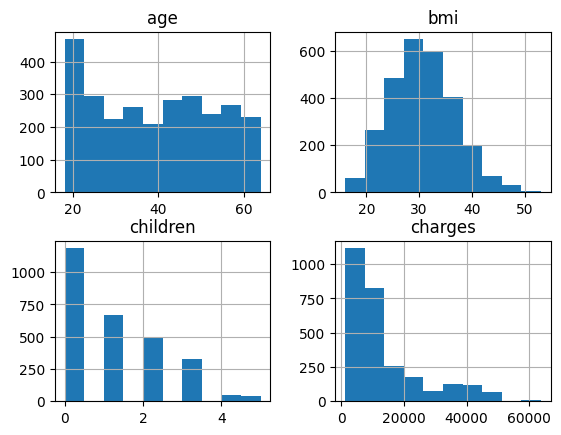

In [ ]:
df.hist() # distribución de la variable

###Primeros insights:

**Edad:**

La edad promedio es de aproximadamente 39 años, con un rango de 18 a 64 años.

**IMC (BMI):**

Con un promedio de alrededor de 30.70, se nota que, en promedio, la población se encuentra en un rango de sobrepeso, ya que valores superiores a 25 indican sobrepeso.
El rango, que va de 15.96 a 53.13, indica una gran variabilidad: hay individuos con IMC muy bajo y otros con valores muy altos, lo que podría influir en los costos de salud.

**Número de hijos:**

El promedio es de 1.10 hijos, y se observa que la mayoría de las personas tienen 0 o 1 hijo, aunque llega hasta 5.
Esta variable puede ser relevante si se asume que tener más dependientes podría asociarse a mayores costos (por ejemplo, en seguros familiares).

**Gastos médicos(charges):**

El gasto promedio es de aproximadamente 13,261, pero la mediana es de 9,333, lo que sugiere una distribución sesgada hacia la derecha.
La alta desviación estándar y el amplio rango (de 1,121 a casi 63,770) indican que existen casos con cargos muy elevados, lo que podría estar relacionado con situaciones de salud más costosas o con outliers en los datos.

###Verificacion de duplicados

In [ ]:
# Check for duplicates
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))
duplicates


Number of duplicate rows: 1435


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.590,0,no,northwest,1639.56310
1338,23,male,34.400,0,no,southwest,1826.84300
1339,56,female,39.820,0,no,southeast,11090.71780
1340,27,male,42.130,0,yes,southeast,39611.75770
1341,19,male,24.600,1,no,southwest,1837.23700
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


Teniendo en cuenta que no hay ninguna PK en el dataset, y que las variables pueden repetirse, voy a considerar que no hay duplicados en el dataset, sinó que hay pacientes con las mismas características.Por lo que no se eliminarán los registros que se repiten.

#Transformación de datos y cambios de tipo de variables

Para poder trabajar con las variables categóricas de "sexo" y "fumador", se transformaran dichas variables en valores binarios en donde el sexo female=0 y male=1, Igualmente para pacientes fumadores y no fumadores en donde no-fumadores=0 y fumadores=1

In [ ]:
# 1. Convertir variables categóricas a numéricas
df_processed = df.copy()
# One-hot encoding para 'region'
region_dummies = pd.get_dummies(df_processed['region'], prefix='region', drop_first=True)
df_processed = pd.concat([df_processed.drop('region', axis=1), region_dummies], axis=1)

# Codificación binaria para 'sex' y 'smoker'
df_processed['sex'] = df_processed['sex'].map({'female': 0, 'male': 1})
df_processed['smoker'] = df_processed['smoker'].map({'no': 0, 'yes': 1})


###Cálculo de los outliers

In [ ]:


# Calculate quartiles
Q1 = df_processed['charges'].quantile(0.25)
Q3 = df_processed['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_processed[(df_processed['charges'] < lower_bound) | (df_processed['charges'] > upper_bound)]

# Print or further analyze outliers
print("Outliers in 'charges':")
outliers


Outliers in 'charges':


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
14,27,1,42.13,0,1,39611.7577,False,True,False
19,30,1,35.30,0,1,36837.4670,False,False,True
23,34,0,31.92,1,1,37701.8768,False,False,False
29,31,1,36.30,2,1,38711.0000,False,False,True
30,22,1,35.60,0,1,35585.5760,False,False,True
...,...,...,...,...,...,...,...,...,...
2735,52,1,41.80,2,1,47269.8540,False,True,False
2736,64,1,36.96,2,1,49577.6624,False,True,False
2744,32,1,33.63,1,1,37607.5277,False,False,False
2764,22,0,31.02,3,1,35595.5898,False,True,False


###Análisis de outliers


In [ ]:
outliers.describe()


,age,sex,bmi,children,smoker,charges
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,40.722973,0.648649,35.582500,1.175676,0.979730,41959.948347
std,13.898821,0.478201,4.385723,1.121235,0.141162,5580.318886
min,18.000000,0.000000,22.895000,0.000000,0.000000,34439.855900
25%,29.000000,0.000000,32.756250,0.000000,1.000000,37607.527700
50%,42.000000,1.000000,35.200000,1.000000,1.000000,40936.857450
75%,52.000000,1.000000,37.640000,2.000000,1.000000,45748.457138
max,64.000000,1.000000,52.580000,4.000000,1.000000,63770.428010


###En base al análisis se puede estimar que:

Smoker: 96.7% de los outliers son fumadores (vs 20.5% en datos normales)

BMI: Promedio de 35.2 en outliers (vs 30.7 en datos normales)

Age: Promedio de 41.3 años en outliers (vs 39.2 en datos normales)

Dado que los datos tienen coerencia en cuanto a la combinación de factores de riezgo en personas que son outliers, sería un error eliminar dichos registros ya que no serían resultado de datos erróneos y su elimininación representaría un sesgo en el análisis.  


##Correlación entre características de los asegurados y los gastos médicos.

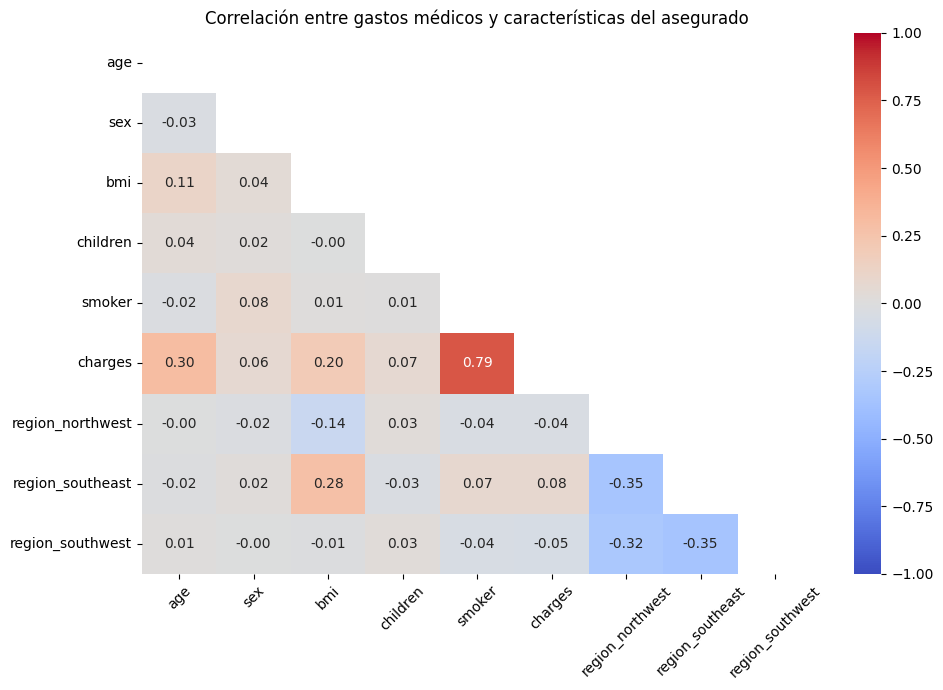

In [ ]:
# Correlación entre características de los asegurados y los gastos médicos.


# 2. Calcular matriz de correlación
correlation = df_processed.corr(method='pearson')

# 3. Crear el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation,
            annot=True,
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            fmt=".2f",
            mask=np.triu(np.ones_like(correlation, dtype=bool)))
plt.title("Correlación entre gastos médicos y características del asegurado")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



**Correlación entre gastos médicos y edad (0.3)**: Hay una correlación positiva moderada que sugiere que existe una tendencia a aumentar el costo al aumentar la edad del asegurado

**Correlación entre gastos médicos e IMC (0.2):** También hay una correlación positiva moderada que suguiere que un aumento en el IMC repercute en los costos.

**Correlación entre gastos médicos y fumadores (0.79):** Aquí vemos una correlación positiva marcada. Esto sugiere que existe una tendencia a que cuando el asegurado es un fumador, los costos aumentan.

**Correlación entre IMC y Region:** Aquí vemos una correlación positiva moderada entre un aumento del IMC con la región Sudeste y una correlación levemente negativa entre el IMC y la región Noroeste lo que sugiere IMC más bajos en dicha región.

## Análisis de Distribuciones Segmentadas

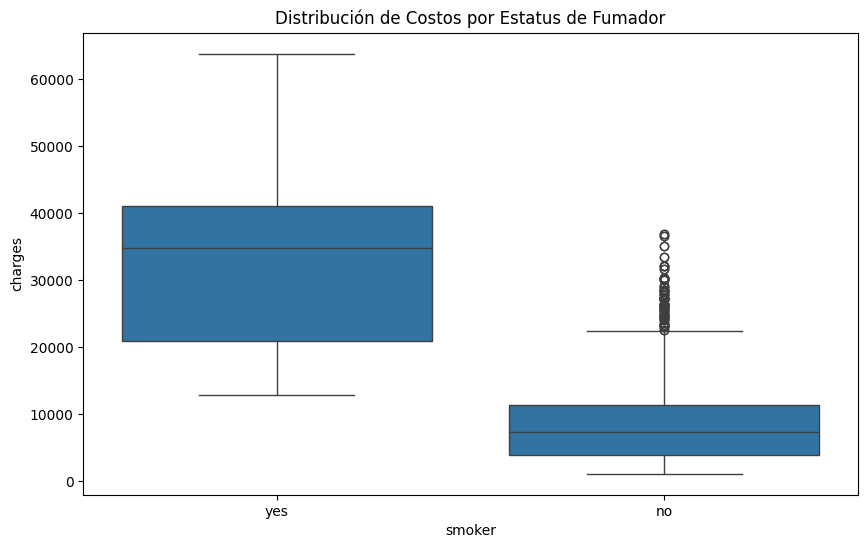

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de cargos por fumador
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Distribución de Costos por Estatus de Fumador')
plt.show()


Puede verse una gran influencia en los gastos en las personas fumadoras

## Análisis de Factores de Riesgo

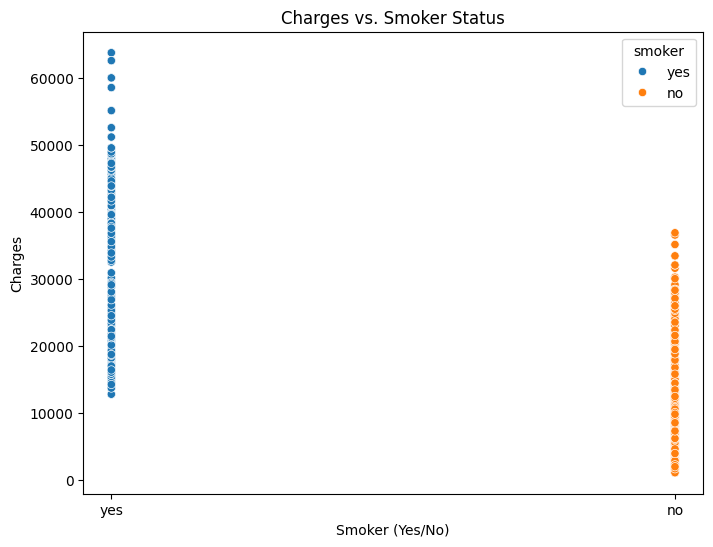

In [ ]:
# prompt: quiero ver charges vs smokers y charges vs BMI

# Create the charges vs. smokers plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='smoker', y='charges', data=df, hue='smoker')
plt.title('Charges vs. Smoker Status')
plt.xlabel('Smoker (Yes/No)')
plt.ylabel('Charges')
plt.show()




Aquí puede verse la enorme influencia de

Relación entre BMI y costos con faceting por fumador

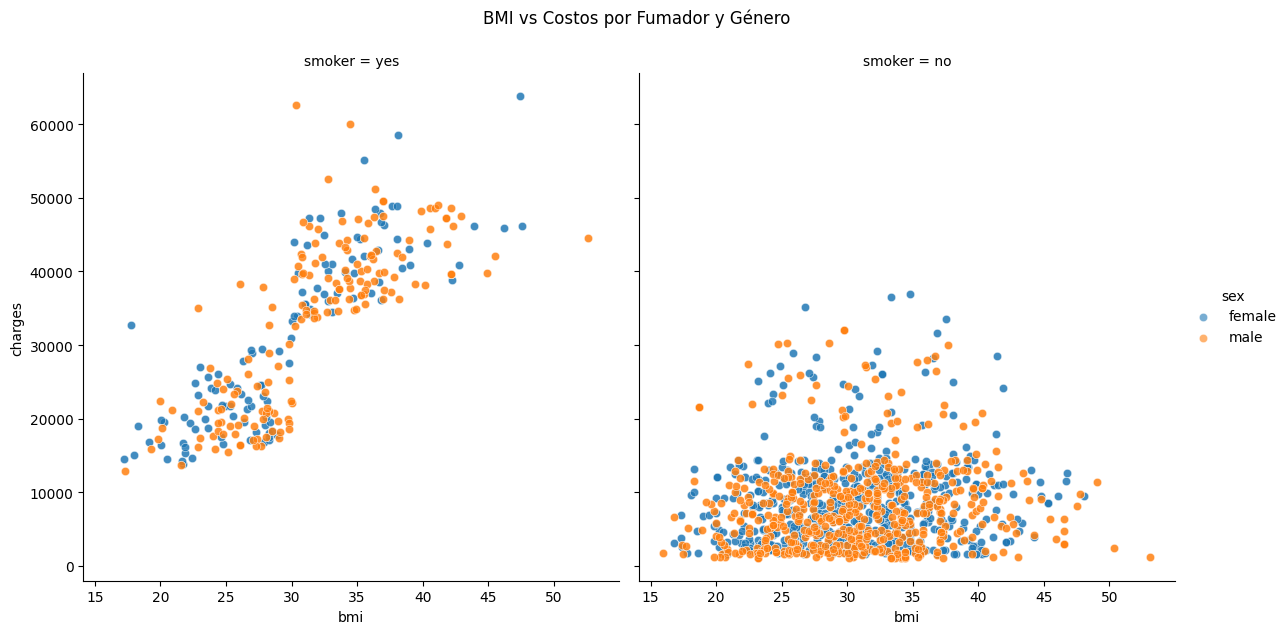

In [ ]:
# Relación entre BMI y costos con faceting por fumador
g = sns.FacetGrid(df, col='smoker', hue='sex', height=6)
g.map(sns.scatterplot, 'bmi', 'charges', alpha=0.6)
g.add_legend()
plt.suptitle('BMI vs Costos por Fumador y Género', y=1.05)
plt.show()

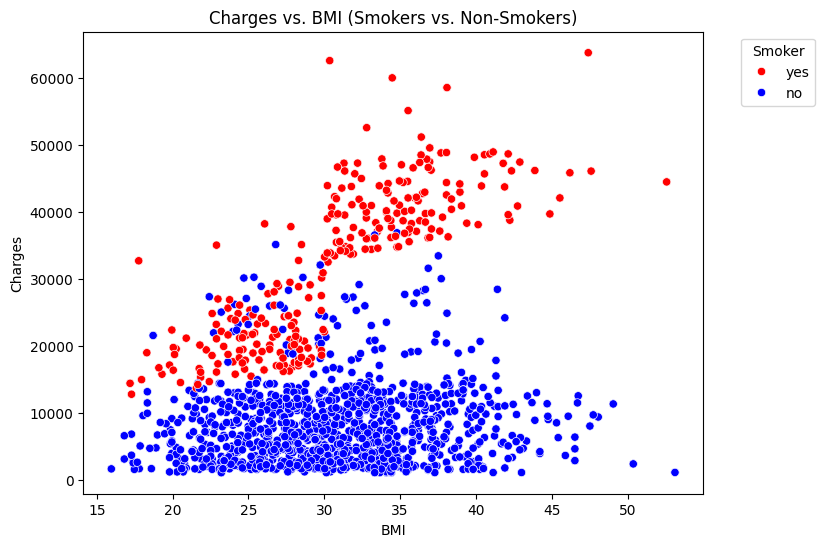

In [ ]:
# Create the charges vs. BMI plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi',
                y='charges',
                hue='smoker',  # Color por estatus de fumador
                palette={'yes': 'red', 'no': 'blue'},  # Colores personalizados
                data=df)
plt.title('Charges vs. BMI (Smokers vs. Non-Smokers)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.show()

En personas fumadoras se puede ver una relación claramente lineal entre IMC y gastos médicos.

Sin embargo no sucede lo mismo con las personas no-fumadoras.

##Análisis de Regresión

In [ ]:
import statsmodels.formula.api as smf

# Modelo de regresión con interacciones
model = smf.ols(
    formula='charges ~ age + bmi + children + C(sex) + C(smoker) + C(region) + bmi:C(smoker)',
    data=df
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1618.
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:31:52   Log-Likelihood:                -27459.
No. Observations:                2772   AIC:                         5.494e+04
Df Residuals:                    2762   BIC:                         5.500e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1971

###Calidad del modelo
**R-squared (R²)**: 0.841
Esto indica que el modelo explica el 84.1% de la variabilidad de los costos de seguros médicos (charges). Es un valor alto, lo que sugiere que el modelo captura bien la relación entre las variables predictoras y la variable dependiente.

**Adj. R-squared (R² ajustado):** 0.840
Similar al R², pero ajustado por el número de variables en el modelo. Este valor cercano al R² muestra que el modelo no está sobreajustado.

**Prob (F-statistic):** 0.000
Un valor muy bajo (< 0.05) indica que el modelo general es significativo, es decir, al menos una de las variables predictoras tiene un impacto estadísticamente significativo en los cargos (charges).
###Coeficientes del modelo
Los coeficientes nos indican cómo afecta cada variable predictora a la variable dependiente (charges), manteniendo las demás constantes.


**Sexo :** -486.9634
Si el asegurado es hombre, los costos esperados son $486.96 menores que los de una mujer, manteniendo las demás variables constantes. Este efecto es estadísticamente significativo (p=0.009).

**Fumador:** -20480.44
Ser fumador incrementa los cargos en aproximadamente $20,480 en comparación con no fumar. Este es el impacto más fuerte en el modelo y es altamente significativo (p<0.0001).

**Región:**

Todas las regiones tienen costos más bajos que el grupo de referencia, que parece ser el "Northeast". Todas son significativas (p<0.0001).

###Variables continuas:

**Edad (age):** 261.6842
Por cada año adicional de edad, los costos de seguro aumentan en $261.68, siendo un efecto significativo (p<0.0001).

**IMC (bmi):** 19.0873
Por cada punto adicional en el índice de masa corporal, los costos aumentan en $19.08. Sin embargo, este coeficiente no es significativo (p=0.282).

**Interacción:** 1444.7114
Esta interacción indica que el impacto del bmi en los cargos es más pronunciado si el asegurado es fumador, con un aumento adicional de $1444.71 por cada punto de BMI. Es altamente significativo (p<0.0001). Esto muestra que el efecto combinado de fumar y tener un alto BMI puede ser sustancial.

**Número de hijos (children):** 525.8364
Cada hijo adicional incrementa los costos en $525.83, siendo un efecto significativo (p<0.0001).

#Conclusiones clave
**Variables más importantes:**
Ser fumador es el predictor más relevante en el aumento de los costos, seguido por la edad y la interacción entre fumar y el BMI.

**Efectos geográficos**:
Vivir en regiones distintas al "Northeast" está asociado con costos más bajos.

**Interacción BMI y fumar:**
El impacto del BMI es mayor entre fumadores, lo que sugiere que los costos médicos asociados al sobrepeso u obesidad están amplificados por el hábito de fumar.

##Análisis de Segmentación por Edad

<ipython-input-27-cee9510f161e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoker_charges = df.groupby(['age_group', 'smoker'])['charges'].mean().unstack()


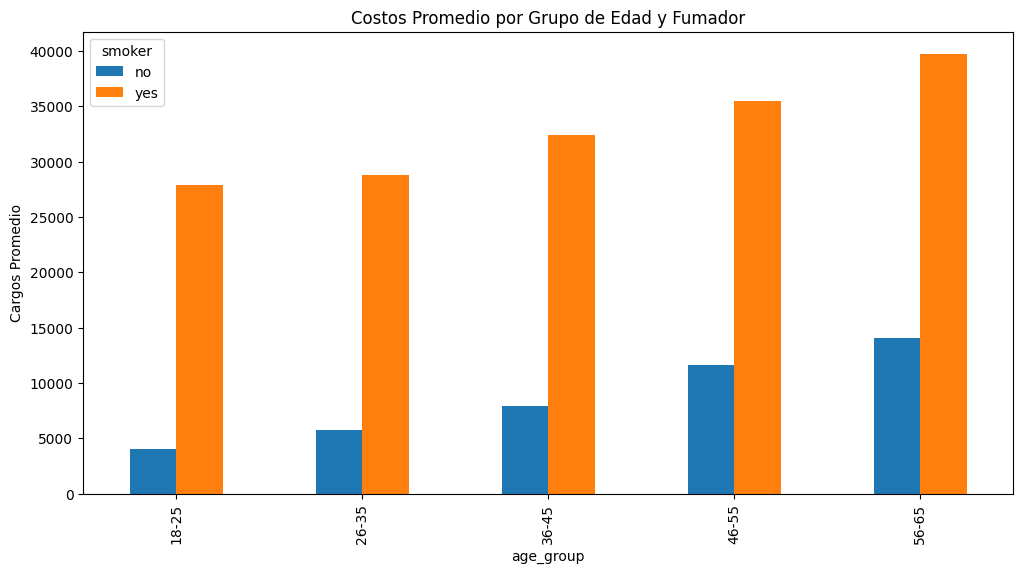

In [ ]:
# Crear grupos de edad
df['age_group'] = pd.cut(df['age'],
                        bins=[17, 25, 35, 45, 55, 65],
                        labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Costo promedio por grupo de edad y fumador
age_smoker_charges = df.groupby(['age_group', 'smoker'])['charges'].mean().unstack()
age_smoker_charges.plot(kind='bar', figsize=(12, 6))
plt.title('Costos Promedio por Grupo de Edad y Fumador')
plt.ylabel('Cargos Promedio')
plt.show()

Puede observarse un aumento de los gastos médicos lineal a medida que los rangos de edades aumentan tanto en fumadores como no fumadores, pero observandose un salto muy significativo en los gastos en los pacietes fumadores.

##Análisis de Costos Extremos

In [ ]:
# Identificar casos con costos en el top 1%
high_charges = df[df['charges'] > df['charges'].quantile(0.99)]

# Características comunes
print(high_charges[['age', 'bmi', 'smoker', 'children']].describe())
print("\nPorcentaje de fumadores en casos extremos:",
      high_charges['smoker'].value_counts(normalize=True))

             age        bmi   children
count  28.000000  28.000000  28.000000
mean   51.000000  37.782143   0.785714
std    12.448412   4.145663   0.956736
min    28.000000  30.360000   0.000000
25%    44.000000  35.530000   0.000000
50%    55.500000  37.330000   0.500000
75%    60.000000  40.920000   1.000000
max    64.000000  47.410000   3.000000

Porcentaje de fumadores en casos extremos: smoker
yes    1.0
Name: proportion, dtype: float64


Los casos extremos estan dados en personas con una edad promedio de 51 años,

##Análisis de Interacciones con Heatmap Avanzado

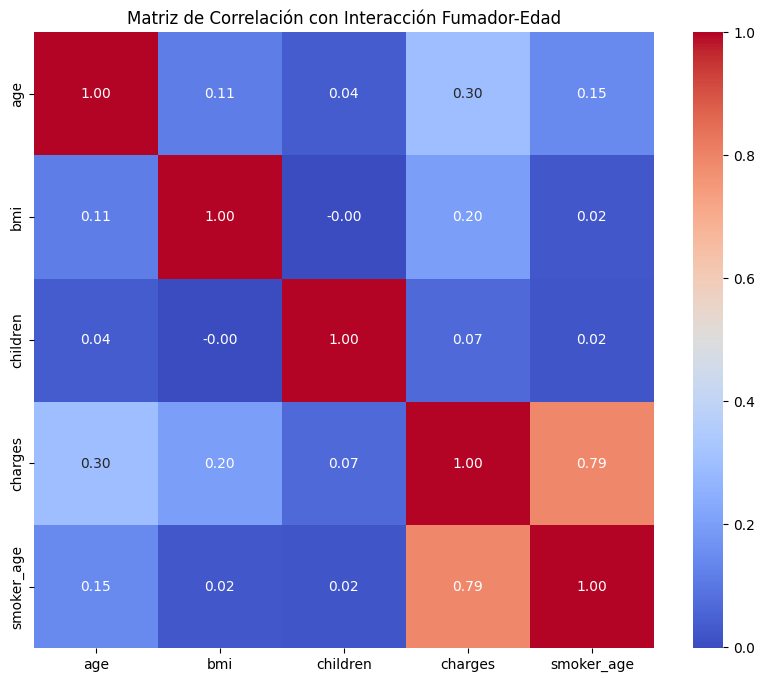

In [ ]:
# Matriz de correlación con variables creadas
df['smoker_age'] = df['smoker'].map({'yes':1, 'no':0}) * df['age']
corr_matrix = df[['age', 'bmi', 'children', 'charges', 'smoker_age']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación con Interacción Fumador-Edad')
plt.show()

In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=60dc6ecc342c8e58a6d930f3de49c0114499ce6599939c2724917fafcb087206
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


##Análisis de Supervivencia (Kaplan-Meier)

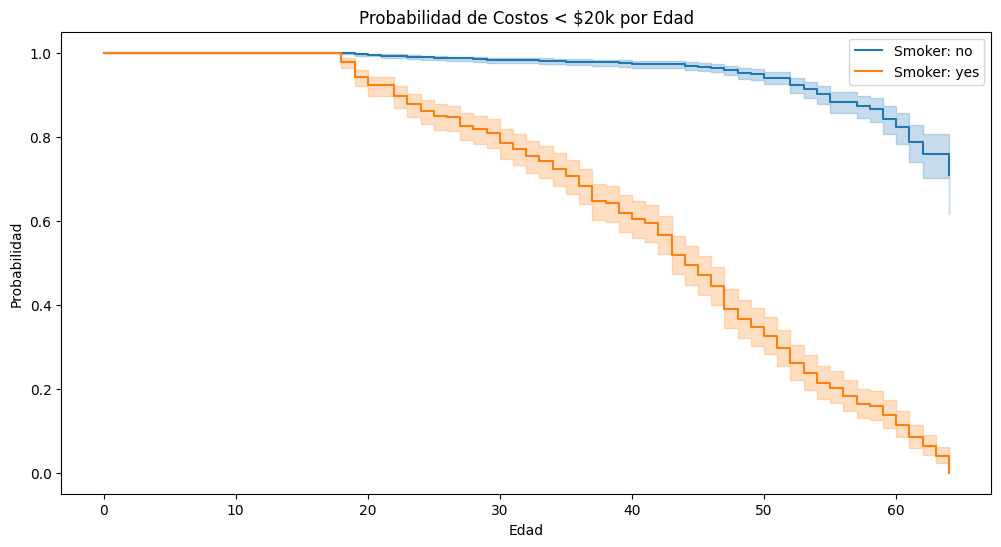

In [ ]:
from lifelines import KaplanMeierFitter

# Crear variable de evento (ej: costo mayor a $20k)
df['event'] = (df['charges'] > 20000).astype(int)

# Curvas de supervivencia por fumador
kmf = KaplanMeierFitter()
plt.figure(figsize=(12, 6))

for name, grouped_df in df.groupby('smoker'):
    kmf.fit(grouped_df['age'], grouped_df['event'], label=f'Smoker: {name}')
    kmf.plot_survival_function()

plt.title('Probabilidad de Costos < $20k por Edad')
plt.xlabel('Edad')
plt.ylabel('Probabilidad')
plt.show()

Puede notarse una marcada tendencia decreciente de la probabilidad de tener gastos médicos por encima de 20K en personas fumadoras.En donde entre los 40 y 50 años se esperan probabilidades del 50 % de tener gastos mayores.